In [229]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import import_ipynb
from data_processing import hiring_data

# Prepare the data (X and y)
X = hiring_data.drop(columns=['decision', 'company'])
y = hiring_data['decision']

In [230]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Random Forest
# -------------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("\n🔎 Random Forest")
print(f"Accuracy:  {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall:    {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, rf_pred):.4f}")

# -------------------------------
# Logistic Regression + Polynomial Features
# -------------------------------
poly_lr_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])
poly_lr_pipeline.fit(X_train, y_train)
poly_lr_pred = poly_lr_pipeline.predict(X_test)

print("\n🔎 Logistic Regression (with Polynomial Features)")
print(f"Accuracy:  {accuracy_score(y_test, poly_lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, poly_lr_pred):.4f}")
print(f"Recall:    {recall_score(y_test, poly_lr_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, poly_lr_pred):.4f}")

# -------------------------------
# Support Vector Machine (SVM)
# -------------------------------
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel='rbf', probability=True, random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)

print("\n🔎 SVM (RBF Kernel)")
print(f"Accuracy:  {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred):.4f}")
print(f"Recall:    {recall_score(y_test, svm_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, svm_pred):.4f}")

# -------------------------------
# XGBoost
# -------------------------------
xgb_model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\n🔎 XGBoost")
print(f"Accuracy:  {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall:    {recall_score(y_test, xgb_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, xgb_pred):.4f}")




🔎 Random Forest
Accuracy:  0.7258
Precision: 0.6127
Recall:    0.4173
F1 Score:  0.4965

🔎 Logistic Regression (with Polynomial Features)
Accuracy:  0.7219
Precision: 0.6084
Recall:    0.3976
F1 Score:  0.4810

🔎 SVM (RBF Kernel)
Accuracy:  0.7360
Precision: 0.6667
Recall:    0.3701
F1 Score:  0.4759

🔎 XGBoost
Accuracy:  0.7372
Precision: 0.6263
Recall:    0.4685
F1 Score:  0.5360


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [09:56:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called df
# and 'gender' is the sensitive attribute, 'target' is the label
X = hiring_data.drop(columns=['decision', 'Id'])
y = hiring_data['decision']
A = hiring_data['gender']  # Sensitive attribute

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_test['gender'].value_counts()


gender
0    432
1    352
Name: count, dtype: int64

In [232]:
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(random_state = 42)
# Train the RandomForest model normally
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# True labels
y_true = y_test

# Compute confusion matrix per group (gender)
for gender in [0, 1]:  # Assuming 0 is male and 1 is female
    print(f"Confusion Matrix for Gender {gender}:")
    gender_indices = X_test['gender'] == gender
    y_true_gender = y_true[gender_indices]
    y_pred_gender = y_pred[gender_indices]
    cm = confusion_matrix(y_true_gender, y_pred_gender)
    print(cm)


Confusion Matrix for Gender 0:
[[248  30]
 [ 33 121]]
Confusion Matrix for Gender 1:
[[229  23]
 [ 36  64]]


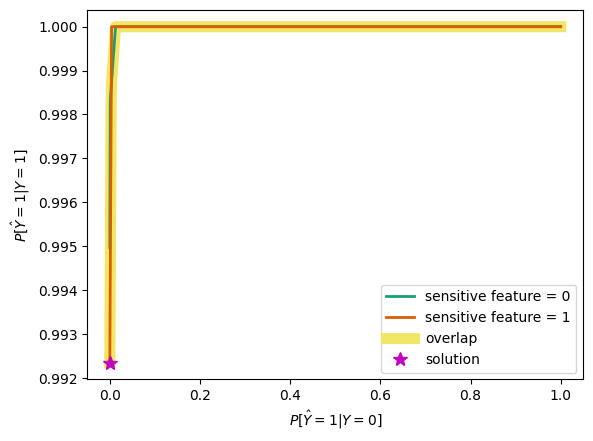

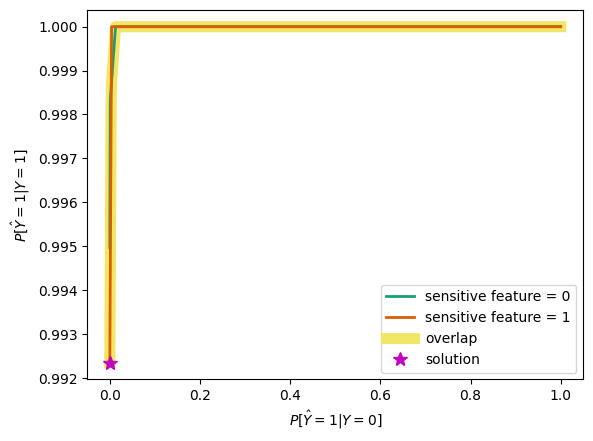

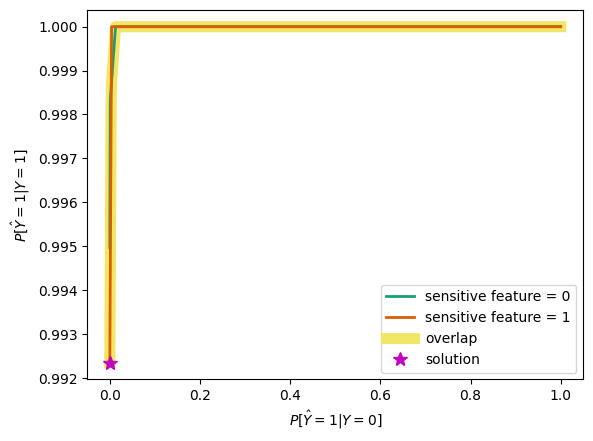

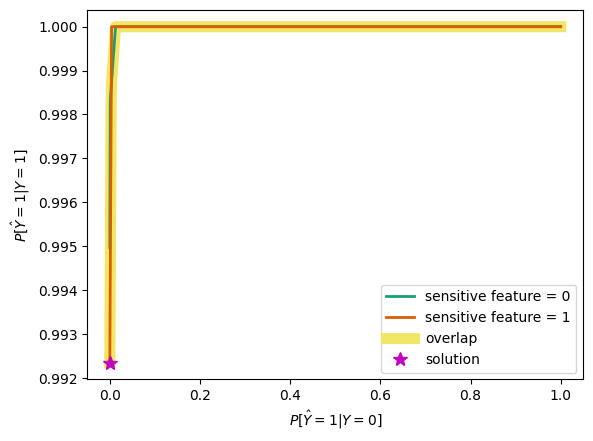

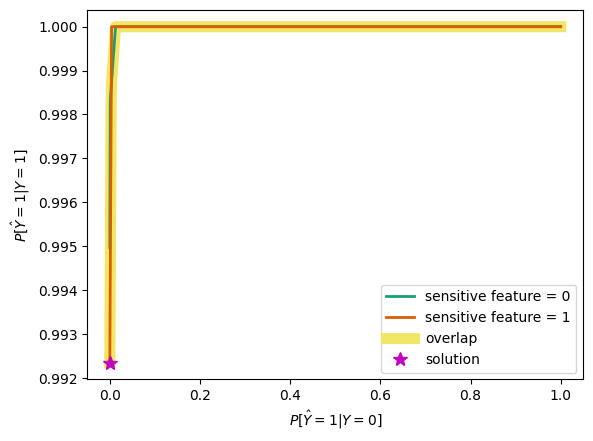

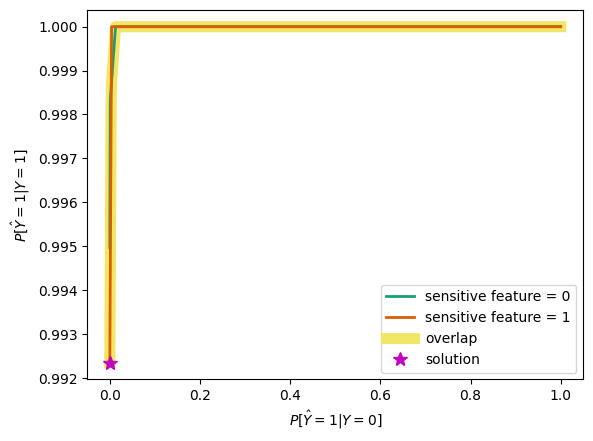

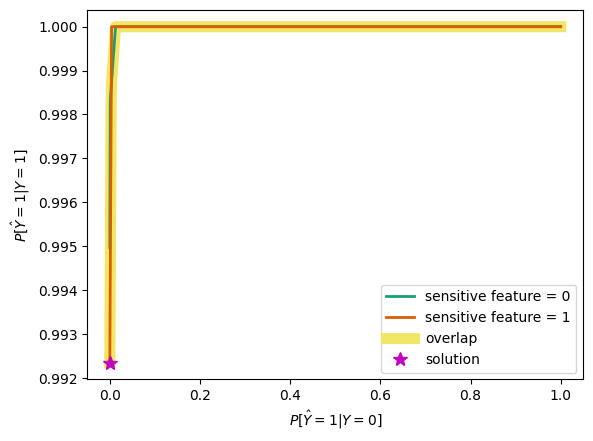

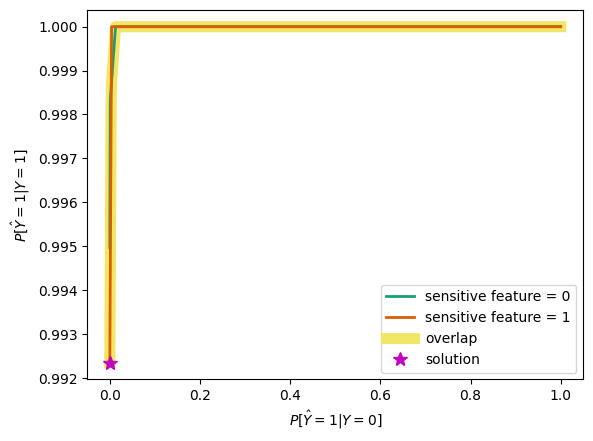

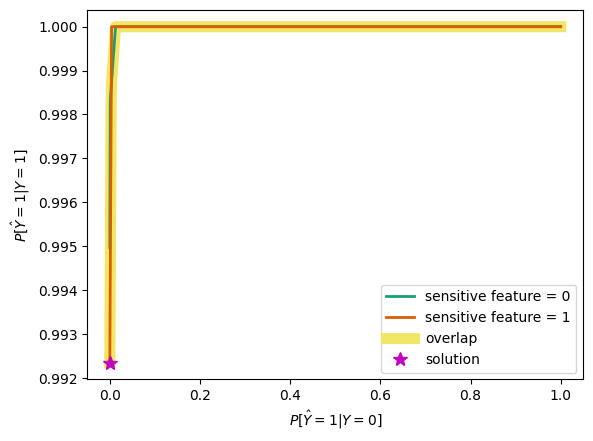

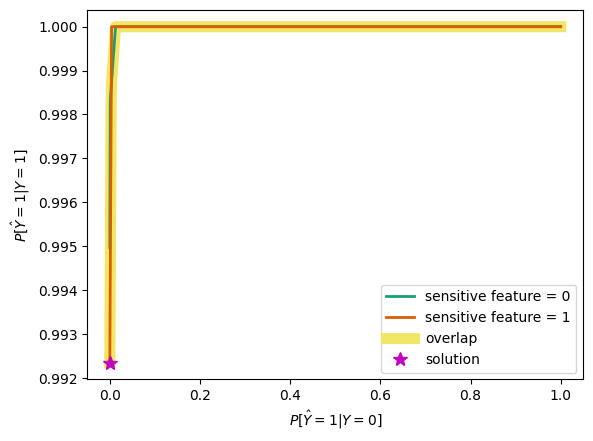

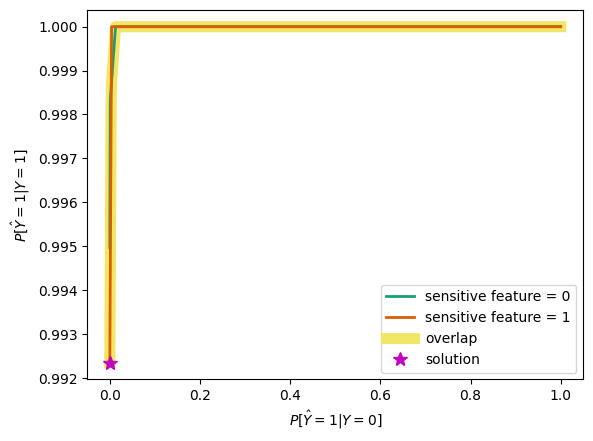

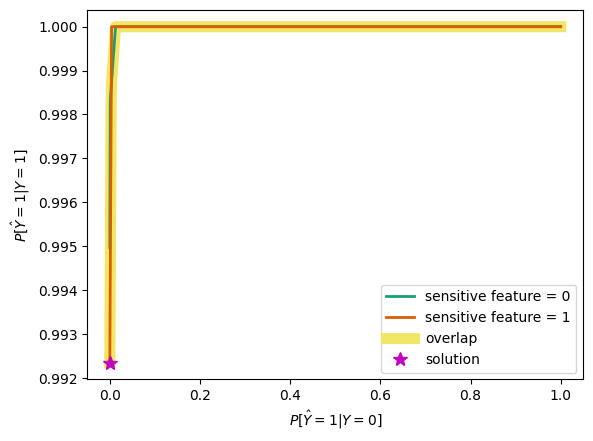

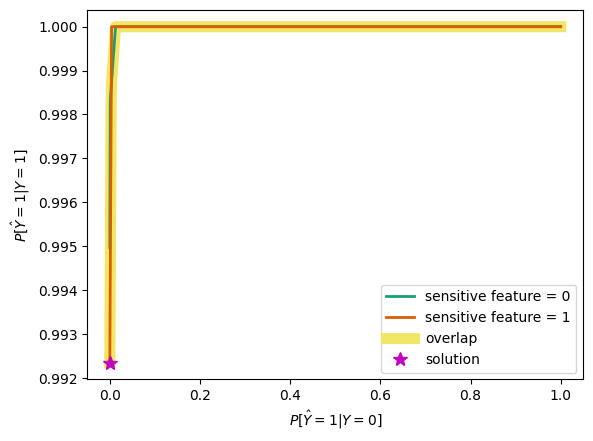

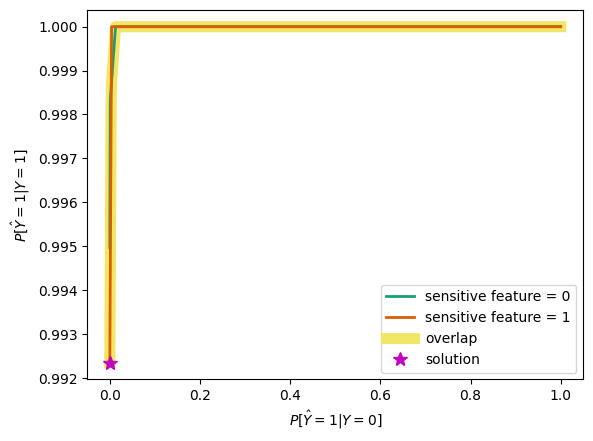

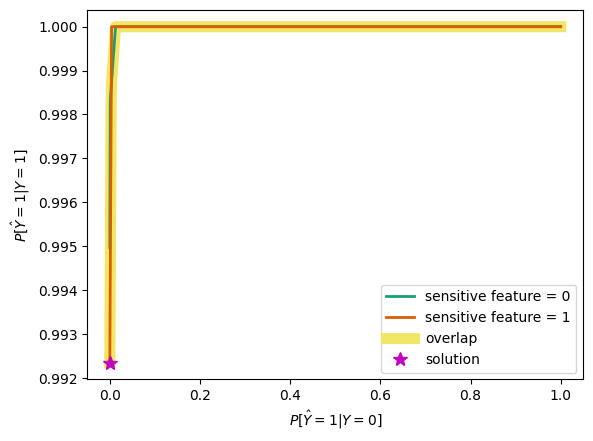

KeyboardInterrupt: 

In [233]:
# Train the Random Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

# Split the data (assuming you have already defined X_train, y_train, and X_test)

# A_train is the sensitive feature 'gender'
A_train = X_train['gender']
X_train = X_train.drop(columns=['gender'])

# Post-process to enforce statistical parity
postprocess = ThresholdOptimizer(
    estimator=rf,
    constraints="equalized_odds",
    prefit=False
)

# Fit the model with the training data
postprocess.fit(X_train, y_train, sensitive_features=A_train)

# Iterate over 500 random samples for analysis
gender_differences = []

for i in range(500):
    # Sample 20% of the test set randomly
    X_test2 = X_test.sample(frac=0.9, random_state=i)
    
    # Extract the sensitive feature 'gender' for the test set
    A_test = X_test2['gender']
    X_test_sub = X_test2.drop(columns=['gender'])

    # Get fair predictions using the post-processing technique
    y_pred_fair = postprocess.predict(X_test_sub, sensitive_features=A_test)
    plot_threshold_optimizer(postprocess)

    # Add predictions to the test set
    X_test2['y_pred'] = y_pred_fair

    # Filter decision = 1 (positive class)
    X_test2 = X_test2[X_test2['y_pred'] == 1]

    # Calculate the normalized counts of gender in the filtered data
    gender_share = X_test2['gender'].value_counts(normalize=True)

    # Safely get the shares for male (0) and female (1), defaulting to 0 if missing
    male_share = gender_share.get(0, 0)
    female_share = gender_share.get(1, 0)

    # Calculate the percentage point difference between male and female shares
    gender_difference = male_share - female_share

    # Store the result for this iteration
    gender_differences.append(gender_difference)

# You can now analyze the stored gender differences, e.g., print the average difference
print(f'Average gender difference: {sum(gender_differences) / len(gender_differences)}')

import statistics
# Calculate the mean of the gender differences
mean_gender_difference = statistics.mean(gender_differences)
print(f'Mean gender difference: {mean_gender_difference}')
